In [1]:
import nest_asyncio

import sys
sys.path.append('/home/ryuseikano/Study/dust_galaxy_sed')

# ネストされたイベントループを許可
nest_asyncio.apply()

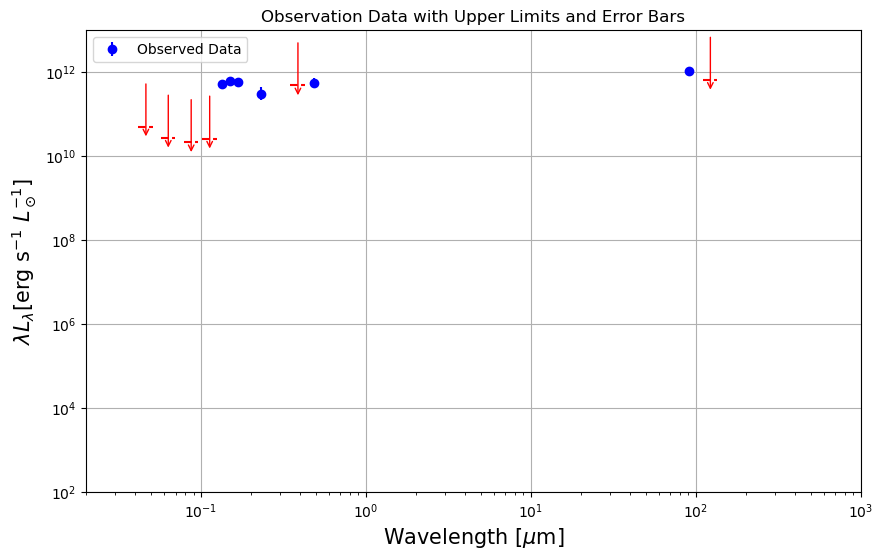

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def observational_sed_diagram(observational_data):
    # Load data
    data = np.loadtxt(observational_data, skiprows=1)
    t = data[:, 0]
    y = data[:, 1]
    error_plus = data[:, 2]
    error_minus = data[:, 3]
    upper_limit = data[:, 4].astype(bool)

    # Separate normal and upper limit data
    t_normal = t[~upper_limit]
    y_normal = y[~upper_limit]
    errors_normal = [error_minus[~upper_limit], error_plus[~upper_limit]]

    t_upper = t[upper_limit]
    y_upper = y[upper_limit]

    # Plot setup
    plt.figure(figsize=(10, 6))

    # Plot normal observed data with error bars
    plt.errorbar(t_normal, y_normal, yerr=errors_normal, fmt='o', color='blue', label='Observed Data')

    # Plot upper limits with dashed lines and longer downward arrows
    for i in range(len(t_upper)):
        # Add dashed horizontal line
        plt.hlines(y_upper[i], t_upper[i] * 0.9, t_upper[i] * 1.1, color='red', linestyles='dashed')
        
        # Add a longer downward arrow at the end of the line
        plt.annotate('', xy=(t_upper[i], y_upper[i] * 0.5), xytext=(t_upper[i], y_upper[i] * 12),
                     arrowprops=dict(arrowstyle="->", color='red'))

    # Graph settings
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Wavelength [$\mu$m]', fontsize=15)
    plt.ylabel('$\lambda L_\lambda $[erg s$^{-1}$ $L_\odot^{-1}$]', fontsize=15)
    plt.title('Observation Data with Upper Limits and Error Bars')
    plt.legend()
    plt.grid()
    plt.xlim(0.2e-1, 1e3)
    plt.ylim(1e2, 1e13)

    plt.show()

# Display observational data
observationnal_data = 'observation/MACS0416Y1.dat'
observational_sed_diagram(observationnal_data)


In [ ]:
import asyncio
from galaxy_sed.mcmc import MCMCOptimizer
from galaxy_sed.diagram import delete_past_data
from galaxy_sed.hyperparams import get_hyperparams

galaxy_age = 4  # 4: 500Myr, 5: 600Myr, 129: 130Myr=13Gyr
galaxy_mass = 100  # 1: 1e9, 100:1e11
starformation_timescale_Gyr = 3.9 # 1: 1Gyr

# 初期値の設定
n_walkers = 50
n_dimensions = 6

# 各パラメータの下限と上限を設定
param_limits = {
    "galaxy_mass_min": 1, "galaxy_mass_max": 700,
    "galaxy_age_min": 0, "galaxy_age_max": 10,
    "starformation_timescale_min": 0.01, "starformation_timescale_max": 5,
    "gas_infall_timescale_min": 0.01, "gas_infall_timescale_max": 15,
    "n0_cnm_min": 1, "n0_cnm_max": 1000,
    "sigma_min": 0.01, "sigma_max": 1.0
}

async def main():
    # delete_past_data()
    # ハイパーパラメータを取得
    hyperparams = get_hyperparams(galaxy_age=galaxy_age, galaxy_mass=galaxy_mass, starformation_timescale=starformation_timescale_Gyr)  # galaxy_age のみを指定
    observational_data = 'observation/MACS0416Y1.dat'

    result = await MCMCOptimizer.run_mcmc(hyperparams, observational_data, n_walkers, n_dimensions, param_limits)  # 辞書を渡す

    print("計算結果:", result)

# イベントループを実行
if __name__ == "__main__":
    asyncio.run(main())  # main関数を非同期に実行


In [ ]:
from galaxy_sed.diagram import dust_to_gas_mass_ratio

dust_to_gas_mass_ratio()

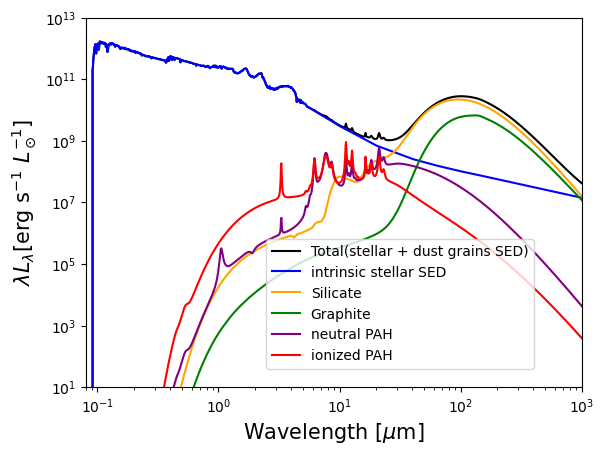

In [1]:
from galaxy_sed.diagram import sed_diagram

sed_diagram()